In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print(train.shape)
print(test.shape)

(1229, 24)
(308, 22)


In [3]:
#Exploratory data analyis
train.head(5)

,DOJ,Sub-Function,Total years of experience (in months) at the time of joining,DOB,Nature of employment (Advisory/ Retainer/ Contractual /Permanent),Hipo Status,V Connect,Sub-Function - during hire,Designation - during hire,Function - latest,...,Institute,Benchmark company visit (Y/N),Star of business (Y/N),Employee ID,Tenure at current grade (in months),Designation - latest,Grade - latest,Date of exit (if any) (dd-mm-yyyy),Part of internal growth workshop (Y/N),Exited (Y/N)
0,11-03-13,Ore Dressing,0,30-Mar-90,Permanent,N,N,Ore Dressing,Engineer - Ore Dressing,Operations,...,"NIT-Raipur - NIT-Raipur,,",Y,N,569088,0,Engineer - Ore Dressing,M7,28-03-16,N,Y
1,10-02-14,Mechanical,0,23-Dec-91,Permanent,N,N,Mechanical,Engineer - Mechanical,Maintenance,...,Manipal Inst of Technology - Manipal Universit...,N,N,573304,0,Engineer - Mechanical,M7,23-12-14,N,Y
2,01-07-11,Mining,0,06-Oct-90,Permanent,N,N,Mining,GET - Mining,Operations,...,"CTAE , Udaipur - MPUAT-Udaipur, ,",N,N,560113,0,Engineer - Mining,M7,12-09-15,N,Y
3,15-10-05,Mining,0,03-Dec-82,Permanent,N,N,Operations,Manager - Mining,Operations,...,"BIT, Sindri",Y,N,267474,0,Manager - Mining,M4,24-08-15,N,Y
4,18-05-15,MIS,0,25-Nov-91,Permanent,N,N,Finance,Associate Manager - Finance,Finance,...,"UCCMS College-Udaipur, I.C.A.I",N,N,576220,26,Associate Manager - Finance,M6,30-06-17,N,N


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 24 columns):
DOJ                                                                  1229 non-null object
Sub-Function                                                         1229 non-null object
Total years of experience (in months) at the time of joining         1229 non-null int64
DOB                                                                  1229 non-null object
Nature of employment (Advisory/ Retainer/ Contractual /Permanent)    1229 non-null object
Hipo Status                                                          1229 non-null object
V Connect                                                            1229 non-null object
Sub-Function - during hire                                           1229 non-null object
Designation - during hire                                            1229 non-null object
Function - latest                                                    1229 non-null o

In [5]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total years of experience (in months) at the time of joining,1229.0,17.894223,65.877096,0.0,0.0,0.0,0.0,463.0
Number of Internal Movements (Transfers),1229.0,0.648495,1.045445,0.0,0.0,0.0,1.0,10.0
Employee ID,1229.0,490835.161107,157410.084761,107262.0,297703.0,570705.0,576107.0,888888.0
Tenure at current grade (in months),1229.0,6.725793,12.022326,0.0,0.0,0.0,11.0,42.0


In [6]:
train.isnull().sum()

DOJ                                                                  0
Sub-Function                                                         0
Total years of experience (in months) at the time of joining         0
DOB                                                                  0
Nature of employment (Advisory/ Retainer/ Contractual /Permanent)    0
Hipo Status                                                          0
V Connect                                                            0
Sub-Function - during hire                                           0
Designation - during hire                                            0
Function - latest                                                    0
Leaders connect member (Y/N)                                         0
Function - during hire                                               0
Grade - during hire                                                  0
Number of Internal Movements (Transfers)                             0
Instit

In [7]:
combine=[train,test]

In [8]:
for df in combine:
    df['Hipo Status']=df['Hipo Status'].apply(lambda x:0 if x=='N' else 1)
    df['V Connect']=df['V Connect'].apply(lambda x:0 if x=='N' else 1)
    df['Leaders connect member (Y/N)']=df['Leaders connect member (Y/N)'].apply(lambda x:0 if x=='N' else 1)
    df['Benchmark company visit (Y/N)']=df['Benchmark company visit (Y/N)'].apply(lambda x:0 if x=='N' else 1)
    df['Star of business (Y/N)']=df['Star of business (Y/N)'].apply(lambda x:0 if x=='N' else 1)
    df['Part of internal growth workshop (Y/N)']=df['Part of internal growth workshop (Y/N)'].apply(lambda x:0 if x=='N' else 1)

In [9]:
train['Exited (Y/N)']=train['Exited (Y/N)'].apply(lambda x:0 if x=='N' else 1)

In [10]:
train['Exited (Y/N)'].value_counts()/len(train)

1    0.721725
0    0.278275
Name: Exited (Y/N), dtype: float64

In [11]:
train.head(2)

,DOJ,Sub-Function,Total years of experience (in months) at the time of joining,DOB,Nature of employment (Advisory/ Retainer/ Contractual /Permanent),Hipo Status,V Connect,Sub-Function - during hire,Designation - during hire,Function - latest,...,Institute,Benchmark company visit (Y/N),Star of business (Y/N),Employee ID,Tenure at current grade (in months),Designation - latest,Grade - latest,Date of exit (if any) (dd-mm-yyyy),Part of internal growth workshop (Y/N),Exited (Y/N)
0,11-03-13,Ore Dressing,0,30-Mar-90,Permanent,0,0,Ore Dressing,Engineer - Ore Dressing,Operations,...,"NIT-Raipur - NIT-Raipur,,",1,0,569088,0,Engineer - Ore Dressing,M7,28-03-16,0,1
1,10-02-14,Mechanical,0,23-Dec-91,Permanent,0,0,Mechanical,Engineer - Mechanical,Maintenance,...,Manipal Inst of Technology - Manipal Universit...,0,0,573304,0,Engineer - Mechanical,M7,23-12-14,0,1


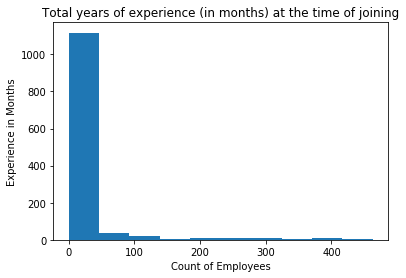

In [12]:
plt.hist(train['Total years of experience (in months) at the time of joining'],bins=10,range=(train['Total years of experience (in months) at the time of joining'].min(),train['Total years of experience (in months) at the time of joining'].max()))
plt.title('Total years of experience (in months) at the time of joining')
plt.xlabel('Count of Employees')
plt.ylabel('Experience in Months')
plt.show()

In [13]:
train['Function - latest'].value_counts()

Operations            606
Maintenance           193
Commercial             96
Finance                71
Lab. Services          50
HSE                    42
Security               33
HR                     28
BE & AO                17
IT                     17
Marketing              17
Exploration            13
Medical                 9
Admin                   8
CSR                     7
Secy. Services          6
Legal                   6
Administration          3
Corp. Affairs           3
Technical Services      3
Corp. Comm.             1
Name: Function - latest, dtype: int64

In [14]:
for df in combine:
    df['Function - latest']=df['Function - latest'].map({'IT':'IT_BE&AO_Mark_Expl','Marketing':'IT_BE&AO_Mark_Expl','BE & AO':'IT_BE&AO_Mark_Expl'
                                                        ,'Exploration':'IT_BE&AO_Mark_Expl','Medical':'Others','Admin':'Others','CSR':'Others',
                                                        'Legal':'Others','Secy. Services':'Others','Administration':'Others','Technical Services':'Others',
                                                        'Corp. Affairs':'Others','Corp. Comm.':'Others','Operations':'Operations','Maintenance':'Maintenance',
                                                        'Commercial':'Commercial','Finance':'Finance','Lab. Services':'Lab. Services','HSE':'HSE',
                                                        'Security':'Security'})

In [15]:
train['Function - latest'].value_counts()

Operations            606
Maintenance           193
Commercial             96
Finance                71
IT_BE&AO_Mark_Expl     64
Lab. Services          50
Others                 46
HSE                    42
Security               33
Name: Function - latest, dtype: int64

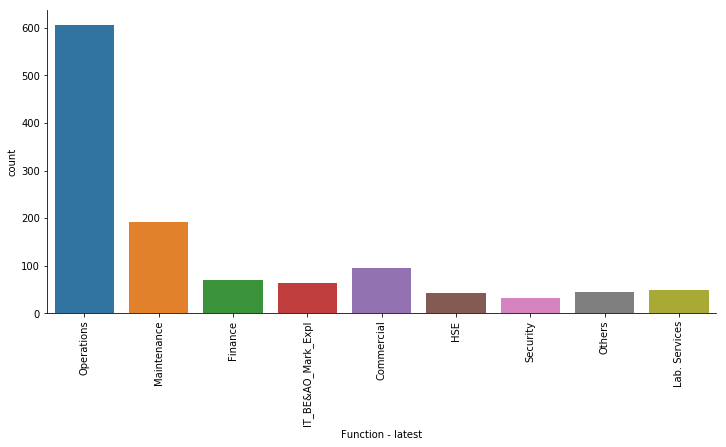

In [16]:
ax=sns.catplot(x='Function - latest',kind='count',aspect=2,height=5,data=train)
ax.set_xticklabels(rotation=90)

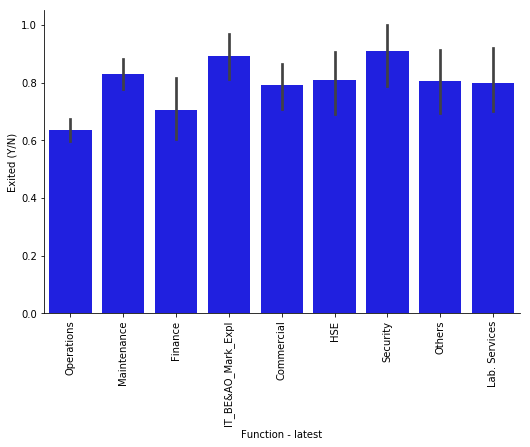

In [17]:
ax=sns.catplot(x='Function - latest',y='Exited (Y/N)',kind='bar',color='b',aspect=1.5,data=train)
ax.set_xticklabels(rotation=90)

In [18]:
train['Function - during hire'].value_counts()

Operations              209
Maintenance             203
Mining                  162
Process                  82
Commercial               72
Finance                  70
Ore Dressing             56
Lab. Services            43
Security                 32
Mining Project           31
Geology                  28
HR                       28
HSE                      21
Stores                   16
IT                       15
Marketing                13
Safety                   13
Exploration              12
Administration            9
Medical                   9
Environment               8
Survey                    8
Power                     7
Legal                     6
Paste Fill                5
Secy. Services            5
Asset Optimization        5
CSR                       5
BE & AO                   5
Mine Planning             5
Mineral Processing        4
Admin                     3
Rock Mechanics            3
Corp. Affairs             3
Technical Services        3
Business Excellence 

In [19]:
train['Sub-Function'].value_counts()

Mining                   252
Process                  155
Mechanical                99
Finance                   69
Ore Dressing              65
Electrical                53
Lab. Services             47
Geology                   34
Stores                    33
Security                  33
Safety                    28
HR                        28
Instrumentation           22
Purchase                  21
Marketing                 17
Environment               14
Power                     14
Exploration               13
Asset Optimization        12
Procurement               12
IT                        11
Metallurgy & Material     11
Administration            10
Medical                    9
Survey                     9
Geotech                    9
Civil                      9
Weighbridge                8
Logistics                  8
Mining Project             7
                        ... 
CICC                       2
Improvement Projects       2
Executive Assistance       2
Ore-Dressing  

In [20]:
train['Grade - during hire'].value_counts()

M7    553
M9    265
M6    168
M4     80
M8     53
M5     40
M2     27
M3     26
M1     16
P       1
Name: Grade - during hire, dtype: int64

In [21]:
train['Grade - latest'].value_counts()

M7    537
M9    251
M6    175
M4     79
M8     65
M5     51
M3     28
M2     25
M1     17
P       1
Name: Grade - latest, dtype: int64

In [22]:
train.groupby("Sub-Function",as_index=False).agg({'Exited (Y/N)':np.mean}).sort_values('Exited (Y/N)',ascending=False)

,Sub-Function,Exited (Y/N)
39,Manufacturing,1.000000
60,Production & Process Engineering,1.000000
30,Improvement Projects,1.000000
32,Investor Relations,1.000000
34,Land Acquisition,1.000000
36,Location Head,1.000000
42,Medical,1.000000
49,Mining Project,1.000000
56,Power,1.000000
58,Process - CPP,1.000000


In [23]:
train.groupby('Nature of employment (Advisory/ Retainer/ Contractual /Permanent)',as_index=False).agg({'Exited (Y/N)':np.mean}).sort_values('Exited (Y/N)',ascending=False)

,Nature of employment (Advisory/ Retainer/ Contractual /Permanent),Exited (Y/N)
2,Retainer,0.957447
0,Expat,0.833333
1,Permanent,0.711111


In [24]:
train.groupby('Hipo Status',as_index=False).agg({'Exited (Y/N)':np.mean}).sort_values('Exited (Y/N)',ascending=False)

,Hipo Status,Exited (Y/N)
1,1,0.871795
0,0,0.716807


In [25]:
train.groupby('V Connect',as_index=False).agg({'Exited (Y/N)':np.mean}).sort_values('Exited (Y/N)',ascending=False)

,V Connect,Exited (Y/N)
1,1,0.833333
0,0,0.721177


In [26]:
train.groupby('Sub-Function - during hire',as_index=False).agg({'Exited (Y/N)':np.mean}).sort_values('Exited (Y/N)',ascending=False)

,Sub-Function - during hire,Exited (Y/N)
0,Ventilation,1.000000
17,Engineering Services,1.000000
39,Medical,1.000000
48,Ore Dressing,1.000000
36,Manufacturing,1.000000
1,AOC,1.000000
51,Planning,1.000000
33,Location Head,1.000000
31,Land Acquisition,1.000000
29,Investor Relations,1.000000


In [27]:
train.groupby('Designation - during hire',as_index=False).agg({'Exited (Y/N)':np.mean}).sort_values('Exited (Y/N)',ascending=False)

,Designation - during hire,Exited (Y/N)
122,Executive - Marketing,1.000000
146,General Manager - Projects,1.000000
149,GeologistTrainee,1.000000
150,Geophysicist,1.000000
152,Geophysicist Trainee - Geophysics,1.000000
153,Head - Technical Services,1.000000
155,Head - Geo Technical,1.000000
156,Head - Laboratory,1.000000
157,Head - Mine Planning,1.000000
159,Head - Security,1.000000


In [28]:
train.groupby('Function - latest',as_index=False).agg({'Exited (Y/N)':np.mean}).sort_values('Exited (Y/N)',ascending=False)

,Function - latest,Exited (Y/N)
8,Security,0.909091
3,IT_BE&AO_Mark_Expl,0.890625
5,Maintenance,0.829016
2,HSE,0.809524
7,Others,0.804348
4,Lab. Services,0.800000
0,Commercial,0.791667
1,Finance,0.704225
6,Operations,0.635314


In [29]:
train.groupby('Leaders connect member (Y/N)',as_index=False).agg({'Exited (Y/N)':np.mean}).sort_values('Exited (Y/N)',ascending=False)

,Leaders connect member (Y/N),Exited (Y/N)
1,1,1.00000
0,0,0.72036


In [30]:
train.groupby('Function - during hire',as_index=False).agg({'Exited (Y/N)':np.mean}).sort_values('Exited (Y/N)',ascending=False)

,Function - during hire,Exited (Y/N)
0,Ventilation,1.000000
15,Engineering Services,1.000000
56,Unit Head,1.000000
47,Projects,1.000000
46,Project,1.000000
44,Power,1.000000
43,Planning,1.000000
40,Ore Dressing,1.000000
38,Mining Projects,1.000000
32,Medical,1.000000


In [31]:
train.groupby('Grade - during hire',as_index=False).agg({'Exited (Y/N)':np.mean}).sort_values('Exited (Y/N)',ascending=False)

,Grade - during hire,Exited (Y/N)
7,M8,1.000000
9,P,1.000000
1,M2,0.962963
3,M4,0.937500
4,M5,0.925000
2,M3,0.923077
5,M6,0.809524
8,M9,0.698113
0,M1,0.687500
6,M7,0.613020


In [32]:
train.groupby('Institute',as_index=False).agg({'Exited (Y/N)':np.mean}).sort_values('Exited (Y/N)',ascending=False)

,Institute,Exited (Y/N)
0,"- , Shri Varalakshim Polytechnic, CAD-CAM Tec...",1.0
465,NATIONAL POWER TRAINING INSTITUTE,1.0
442,Manipal Institute of Technology-Manipal - Mani...,1.0
443,Manipal University,1.0
444,"Medicaps Inst of T & M, RGPV-Bhopal",1.0
445,"Medicaps Inst of Tech & Mgt Indore, RGPU",1.0
449,Mepco Schlenk Engg College - Anna University-C...,1.0
450,"Mithibai College - Mumbai University,ICAI",1.0
464,NALSAR,1.0
466,NDB Govt College-Nohar,1.0


In [33]:
train.groupby('Benchmark company visit (Y/N)',as_index=False).agg({'Exited (Y/N)':np.mean}).sort_values('Exited (Y/N)',ascending=False)

,Benchmark company visit (Y/N),Exited (Y/N)
1,1,0.875000
0,0,0.715495


In [34]:
train.groupby('Star of business (Y/N)',as_index=False).agg({'Exited (Y/N)':np.mean}).sort_values('Exited (Y/N)',ascending=False)

,Star of business (Y/N),Exited (Y/N)
1,1,0.862069
0,0,0.718333


In [35]:
train.groupby('Designation - latest',as_index=False).agg({'Exited (Y/N)':np.mean}).sort_values('Exited (Y/N)',ascending=False)

,Designation - latest,Exited (Y/N)
241,Vice President � Community Relations,1.000000
134,Executive - HR,1.000000
124,Engineer - SAP,1.000000
126,Engineer � Electrical,1.000000
127,Engineer � Mechanical,1.000000
128,Engineer � Mining,1.000000
129,Environmentalist,1.000000
130,Executive - CSR,1.000000
131,Executive - Commercial,1.000000
206,Officer - Finance,1.000000


In [36]:
train.groupby('Grade - latest',as_index=False).agg({'Exited (Y/N)':np.mean}).sort_values('Exited (Y/N)',ascending=False)

,Grade - latest,Exited (Y/N)
9,P,1.000000
7,M8,0.984615
1,M2,0.960000
4,M5,0.941176
3,M4,0.936709
2,M3,0.928571
5,M6,0.817143
0,M1,0.705882
8,M9,0.685259
6,M7,0.601490


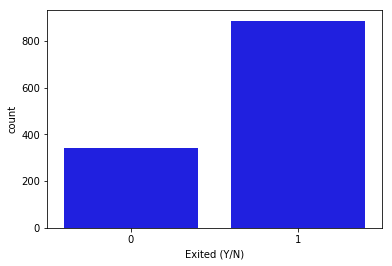

In [37]:
#Visualizations
#Prediction labels
sns.countplot(x='Exited (Y/N)',data=train,color='blue')

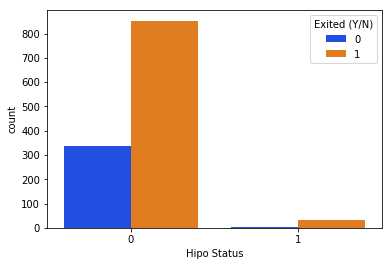

In [39]:
#Plot Hipo status Vs Exited
sns.countplot(x='Hipo Status',hue='Exited (Y/N)',data=train,palette='bright')

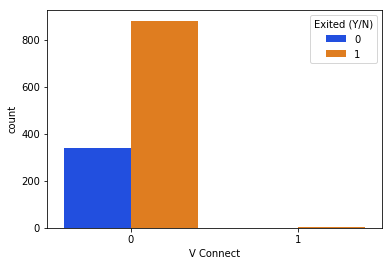

In [40]:
#Plot V connect Vs Exited
sns.countplot(x='V Connect',hue='Exited (Y/N)',data=train,palette="bright")

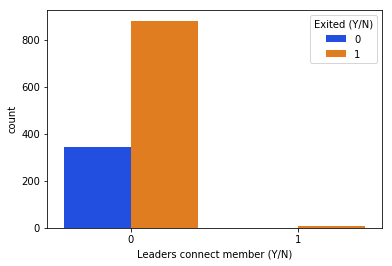

In [41]:
#Plot Leaders Connect member Vs Exited
sns.countplot(x='Leaders connect member (Y/N)',hue='Exited (Y/N)',data=train,palette="bright")

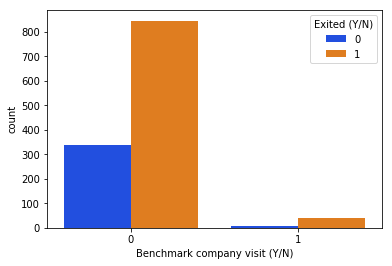

In [43]:
#Plot Benchmark company visit Vs Exited
sns.countplot(x='Benchmark company visit (Y/N)',hue='Exited (Y/N)',data=train,palette='bright')

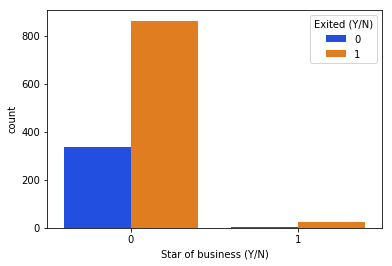

In [44]:
#Plot Star of Business Vs Exited
sns.countplot(x='Star of business (Y/N)',hue='Exited (Y/N)',palette="bright",data=train)

In [45]:
#Feature extraction - Job duration from DOJ and Date of Exit
train['DOJ']=pd.to_datetime(train['DOJ'])

In [46]:
train['Date of exit (if any) (dd-mm-yyyy)']=pd.to_datetime(train['Date of exit (if any) (dd-mm-yyyy)'])

In [47]:
train['Job duration']=((train['Date of exit (if any) (dd-mm-yyyy)']-train['DOJ'])/np.timedelta64(1,'M')).astype(int)

In [48]:
train['Job duration'].head(5)

0     28
1      2
2     59
3    118
4     25
Name: Job duration, dtype: int32

2.714377370012507

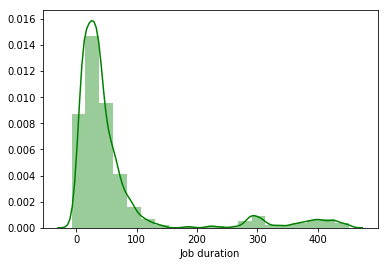

In [51]:
#Distribution of Job duration
sns.distplot(train['Job duration'],color='g',bins=20,hist=True)
train['Job duration'].skew()

4.436104407080011

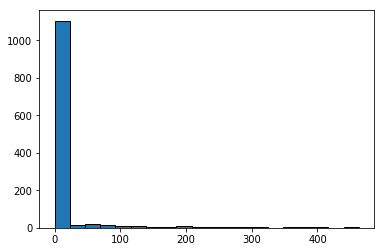

In [52]:
#Distribution of Total years of Experience at the time of joining
train['Total years of experience (in months) at the time of joining'].hist(grid=False,bins=20,edgecolor='black')
train['Total years of experience (in months) at the time of joining'].skew()

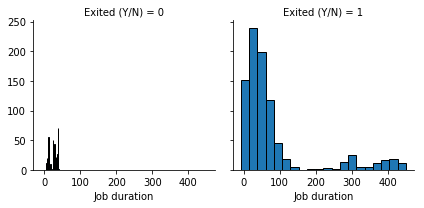

In [54]:
#Distribution of Job duration wrt Exited
g=sns.FacetGrid(train,col='Exited (Y/N)')
g.map(plt.hist,'Job duration',bins=20,edgecolor='black')

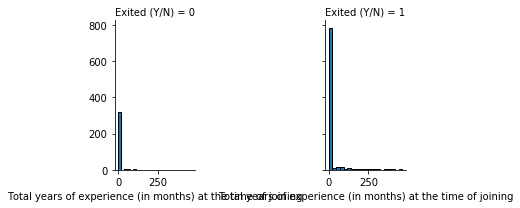

In [59]:
#Distribution of Total years of Exp at the time of joining wrt Exited
g=sns.FacetGrid(train,col='Exited (Y/N)')
g.map(plt.hist,'Total years of experience (in months) at the time of joining',bins=20,edgecolor='black')

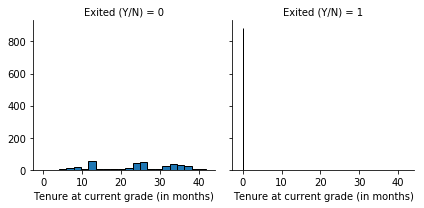

In [58]:
#Distribution of Tenure at current grade wrt Exited
g = sns.FacetGrid(train,col='Exited (Y/N)')
g.map(plt.hist, 'Tenure at current grade (in months)', bins=20,edgecolor='black')

In [60]:
#Model building
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 25 columns):
DOJ                                                                  1229 non-null datetime64[ns]
Sub-Function                                                         1229 non-null object
Total years of experience (in months) at the time of joining         1229 non-null int64
DOB                                                                  1229 non-null object
Nature of employment (Advisory/ Retainer/ Contractual /Permanent)    1229 non-null object
Hipo Status                                                          1229 non-null int64
V Connect                                                            1229 non-null int64
Sub-Function - during hire                                           1229 non-null object
Designation - during hire                                            1229 non-null object
Function - latest                                                    1201 non-

In [61]:
train=train.drop(['DOJ','DOB','Date of exit (if any) (dd-mm-yyyy)','Institute','Employee ID','Tenure at current grade (in months)'],axis=1)

In [62]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 19 columns):
Sub-Function                                                         1229 non-null object
Total years of experience (in months) at the time of joining         1229 non-null int64
Nature of employment (Advisory/ Retainer/ Contractual /Permanent)    1229 non-null object
Hipo Status                                                          1229 non-null int64
V Connect                                                            1229 non-null int64
Sub-Function - during hire                                           1229 non-null object
Designation - during hire                                            1229 non-null object
Function - latest                                                    1201 non-null object
Leaders connect member (Y/N)                                         1229 non-null int64
Function - during hire                                               1229 non-null obje

In [63]:
train=train.drop(['Sub-Function - during hire','Designation - during hire','Sub-Function','Designation - latest'],axis=1)

In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 15 columns):
Total years of experience (in months) at the time of joining         1229 non-null int64
Nature of employment (Advisory/ Retainer/ Contractual /Permanent)    1229 non-null object
Hipo Status                                                          1229 non-null int64
V Connect                                                            1229 non-null int64
Function - latest                                                    1201 non-null object
Leaders connect member (Y/N)                                         1229 non-null int64
Function - during hire                                               1229 non-null object
Grade - during hire                                                  1229 non-null object
Number of Internal Movements (Transfers)                             1229 non-null int64
Benchmark company visit (Y/N)                                        1229 non-null int64

In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 22 columns):
DOJ                                                                  308 non-null object
Sub-Function                                                         308 non-null object
Total years of experience (in months) at the time of joining         308 non-null int64
DOB                                                                  308 non-null object
Nature of employment (Advisory/ Retainer/ Contractual /Permanent)    308 non-null object
Hipo Status                                                          308 non-null int64
V Connect                                                            308 non-null int64
Sub-Function - during hire                                           308 non-null object
Designation - during hire                                            308 non-null object
Function - latest                                                    297 non-null object
Leaders 

In [66]:
test=test.drop(['DOJ', 'DOB','Institute','Employee ID','Tenure at current grade (in months)'],axis=1)

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 17 columns):
Sub-Function                                                         308 non-null object
Total years of experience (in months) at the time of joining         308 non-null int64
Nature of employment (Advisory/ Retainer/ Contractual /Permanent)    308 non-null object
Hipo Status                                                          308 non-null int64
V Connect                                                            308 non-null int64
Sub-Function - during hire                                           308 non-null object
Designation - during hire                                            308 non-null object
Function - latest                                                    297 non-null object
Leaders connect member (Y/N)                                         308 non-null int64
Function - during hire                                               308 non-null object
Grade - d

In [68]:
test=test.drop(['Sub-Function - during hire','Designation - during hire','Sub-Function','Designation - latest'],axis=1)

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 13 columns):
Total years of experience (in months) at the time of joining         308 non-null int64
Nature of employment (Advisory/ Retainer/ Contractual /Permanent)    308 non-null object
Hipo Status                                                          308 non-null int64
V Connect                                                            308 non-null int64
Function - latest                                                    297 non-null object
Leaders connect member (Y/N)                                         308 non-null int64
Function - during hire                                               308 non-null object
Grade - during hire                                                  308 non-null object
Number of Internal Movements (Transfers)                             308 non-null int64
Benchmark company visit (Y/N)                                        308 non-null int64
Star of bus

In [70]:
train.shape

(1229, 15)

In [71]:
test.shape

(308, 13)

In [72]:
X=train.drop('Exited (Y/N)',axis=1)
Y=train['Exited (Y/N)']

In [73]:
X.shape

(1229, 14)

In [74]:
Y.shape

(1229,)

In [75]:
X.head()

,Total years of experience (in months) at the time of joining,Nature of employment (Advisory/ Retainer/ Contractual /Permanent),Hipo Status,V Connect,Function - latest,Leaders connect member (Y/N),Function - during hire,Grade - during hire,Number of Internal Movements (Transfers),Benchmark company visit (Y/N),Star of business (Y/N),Grade - latest,Part of internal growth workshop (Y/N),Job duration
0,0,Permanent,0,0,Operations,0,Ore Dressing,M7,1,1,0,M7,0,28
1,0,Permanent,0,0,Maintenance,0,Maintenance,M7,0,0,0,M7,0,2
2,0,Permanent,0,0,Operations,0,Mining,M7,0,0,0,M7,0,59
3,0,Permanent,0,0,Operations,0,Operations,M4,0,1,0,M4,0,118
4,0,Permanent,0,0,Finance,0,Finance,M6,1,0,0,M6,0,25


In [76]:
X=pd.get_dummies(X)

In [77]:
test=pd.get_dummies(test)

In [78]:
X.head()

,Total years of experience (in months) at the time of joining,Hipo Status,V Connect,Leaders connect member (Y/N),Number of Internal Movements (Transfers),Benchmark company visit (Y/N),Star of business (Y/N),Part of internal growth workshop (Y/N),Job duration,Nature of employment (Advisory/ Retainer/ Contractual /Permanent)_Expat,...,Grade - latest_M1,Grade - latest_M2,Grade - latest_M3,Grade - latest_M4,Grade - latest_M5,Grade - latest_M6,Grade - latest_M7,Grade - latest_M8,Grade - latest_M9,Grade - latest_P
0,0,0,0,0,1,1,0,0,28,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,59,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,118,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,25,0,...,0,0,0,0,0,1,0,0,0,0


In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1229 entries, 0 to 1228
Data columns (total 99 columns):
Total years of experience (in months) at the time of joining                   1229 non-null int64
Hipo Status                                                                    1229 non-null int64
V Connect                                                                      1229 non-null int64
Leaders connect member (Y/N)                                                   1229 non-null int64
Number of Internal Movements (Transfers)                                       1229 non-null int64
Benchmark company visit (Y/N)                                                  1229 non-null int64
Star of business (Y/N)                                                         1229 non-null int64
Part of internal growth workshop (Y/N)                                         1229 non-null int64
Job duration                                                                   1229 non-null int32
Na

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [81]:
X_train.shape

(823, 99)

In [82]:
#Training Benchmark model - Logistic regression
from sklearn.linear_model import LogisticRegression
clf0=LogisticRegression(random_state=10)
clf0.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [83]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
y_pred0=clf0.predict(X_test)
acc0=accuracy_score(y_test,y_pred0)
prec0=precision_score(y_test,y_pred0,average='weighted')
f1_score0=f1_score(y_test,y_pred0,average='weighted')
rec0=recall_score(y_test,y_pred0,average='weighted')
print("Accuracy : ",acc0)
print("Precision : ",prec0)
print("Recall score : ",rec0)
print("f1 score : ",f1_score0)

Accuracy :  0.7684729064039408
Precision :  0.7730625731258441
Recall score :  0.7684729064039408
f1 score :  0.7705915977321313


In [84]:
#Training other models - Random Forest
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(random_state=10)
clf1.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [85]:
y_pred1=clf1.predict(X_test)
acc1=accuracy_score(y_test,y_pred1)
prec1=precision_score(y_test,y_pred1,average='weighted')
f1_score1=f1_score(y_test,y_pred1,average='weighted')
rec1=recall_score(y_test,y_pred1,average='weighted')
print("Accuracy : ",acc1)
print("Precision : ",prec1)
print("Recall score : ",rec1)
print("f1 score : ",f1_score1)

Accuracy :  0.8645320197044335
Precision :  0.8757587924380653
Recall score :  0.8645320197044335
f1 score :  0.8680593669256067


In [86]:
#Grid search for best params
from sklearn.model_selection import GridSearchCV
grid1=GridSearchCV(estimator=clf1,param_grid={'max_depth':[3,4,5,6,7],'n_estimators':[20,30,40,50],'min_samples_leaf':[1,2,3,4]}
                  ,cv=10,scoring='accuracy',n_jobs=-1)
grid1.fit(X_train,y_train)
print('Best params for Random forest: ',grid1.best_params_)

Best params for Random forest:  {'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 50}


C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [87]:
grid1=GridSearchCV(estimator=clf1,param_grid={'max_depth':[19,20,21,22],'n_estimators':[60,70,80,90],'min_samples_leaf':[1,2,3]}
                  ,cv=10,scoring='accuracy',n_jobs=-1)
grid1.fit(X_train,y_train)
print('Best params for Random forest: ',grid1.best_params_)

Best params for Random forest:  {'max_depth': 21, 'min_samples_leaf': 1, 'n_estimators': 70}


In [88]:
#Training on random forest using best params 
clf1=RandomForestClassifier(**grid1.best_params_,random_state=10)
clf1.fit(X_train,y_train)
y_pred1=clf1.predict(X_test)
acc1=accuracy_score(y_test,y_pred1)
prec1=precision_score(y_test,y_pred1,average='weighted')
f1_score1=f1_score(y_test,y_pred1,average='weighted')
rec1=recall_score(y_test,y_pred1,average='weighted')
print("Accuracy : ",acc1)
print("Precision : ",prec1)
print("Recall score : ",rec1)
print("f1 score : ",f1_score1)

Accuracy :  0.8866995073891626
Precision :  0.8924262463760756
Recall score :  0.8866995073891626
f1 score :  0.8886734201508006


In [89]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
clf2=GradientBoostingClassifier(random_state=10)
clf2.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [90]:
y_pred2=clf2.predict(X_test)
acc2=accuracy_score(y_test,y_pred2)
prec2=precision_score(y_test,y_pred2,average='weighted')
f1_score2=f1_score(y_test,y_pred2,average='weighted')
rec2=recall_score(y_test,y_pred2,average='weighted')
print("Accuracy : ",acc2)
print("Precision : ",prec2)
print("Recall score : ",rec2)
print("f1 score : ",f1_score2)

Accuracy :  0.8817733990147784
Precision :  0.8854079929474435
Recall score :  0.8817733990147784
f1 score :  0.8831924286393313


In [91]:
#Grid search for best params
grid2=GridSearchCV(estimator=clf2,param_grid={'max_depth':[4,5,6,7,8],'min_samples_leaf':[1,2,3],'n_estimators':[30,40,50,60,70]},
                   cv=10,scoring='accuracy',n_jobs=-1)
grid2.fit(X_train,y_train)
print('Best params for Gradient boost: ',grid2.best_params_)

Best params for Gradient boost:  {'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 70}


In [84]:
grid2=GridSearchCV(estimator=clf2,param_grid={'max_depth':[10,11,12,13,14,15],'min_samples_leaf':[1,2,3,4,5,6],'n_estimators':[60,70,80,90]},
                   cv=10,scoring='accuracy',n_jobs=-1)
grid2.fit(X_train,y_train)
print('Best params for Gradient boost: ',grid2.best_params_)

Best params for Gradient boost:  {'max_depth': 11, 'min_samples_leaf': 4, 'n_estimators': 70}


In [93]:
clf2=GradientBoostingClassifier(**grid2.best_params_,random_state=10)
clf2.fit(X_train,y_train)
y_pred2=clf2.predict(X_test)
acc2=accuracy_score(y_test,y_pred2)
prec2=precision_score(y_test,y_pred2,average='weighted')
f1_score2=f1_score(y_test,y_pred2,average='weighted')
rec2=recall_score(y_test,y_pred2,average='weighted')
print("Accuracy : ",acc2)
print("Precision : ",prec2)
print("Recall score : ",rec2)
print("f1 score : ",f1_score2)

Accuracy :  0.9137931034482759
Precision :  0.9171672363526692
Recall score :  0.9137931034482759
f1 score :  0.9149476331134421


In [94]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
clf3=AdaBoostClassifier(random_state=10)
clf3.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=10)

In [95]:
y_pred3=clf3.predict(X_test)
acc3=accuracy_score(y_test,y_pred3)
prec3=precision_score(y_test,y_pred3,average='weighted')
f1_score3=f1_score(y_test,y_pred3,average='weighted')
rec3=recall_score(y_test,y_pred3,average='weighted')
print("Accuracy : ",acc3)
print("Precision : ",prec3)
print("Recall score : ",rec3)
print("f1 score : ",f1_score3)

Accuracy :  0.8842364532019704
Precision :  0.89064039408867
Recall score :  0.8842364532019704
f1 score :  0.8864034485300062


In [98]:
#Grid search for best params
grid3=GridSearchCV(estimator=clf3,param_grid={'n_estimators':[40,50,60,70,80,90,100],'learning_rate':[0.8,0.9,1.0]},
                   cv=10,scoring='accuracy',n_jobs=-1)
grid3.fit(X_train,y_train)
print('Best params for Adaboost: ',grid3.best_params_)

Best params for Adaboost:  {'learning_rate': 1.0, 'n_estimators': 90}


In [99]:
clf3=AdaBoostClassifier(**grid3.best_params_,random_state=10)
clf3.fit(X_train,y_train)
y_pred3=clf3.predict(X_test)
acc3=accuracy_score(y_test,y_pred3)
prec3=precision_score(y_test,y_pred3,average='weighted')
f1_score3=f1_score(y_test,y_pred3,average='weighted')
rec3=recall_score(y_test,y_pred3,average='weighted')
print("Accuracy : ",acc3)
print("Precision : ",prec3)
print("Recall score : ",rec3)
print("f1 score : ",f1_score3)

Accuracy :  0.8645320197044335
Precision :  0.8729248420583896
Recall score :  0.8645320197044335
f1 score :  0.8674102125466919


In [101]:
#XGBoost
from xgboost import XGBClassifier
clf4=XGBClassifier(random_state=10)
clf4.fit(X_train,y_train)
y_pred4=clf4.predict(X_test)
acc4=accuracy_score(y_test,y_pred4)
prec4=precision_score(y_test,y_pred4,average='weighted')
f1_score4=f1_score(y_test,y_pred4,average='weighted')
rec4=recall_score(y_test,y_pred4,average='weighted')
print("Accuracy : ",acc4)
print("Precision : ",prec4)
print("Recall score : ",rec4)
print("f1 score : ",f1_score4)

Accuracy :  0.8817733990147784
Precision :  0.8843891529750436
Recall score :  0.8817733990147784
f1 score :  0.8828552839483224


In [102]:
#Grid search on XGBoost
est=np.arange(100,1000,200)
grid4=GridSearchCV(estimator=clf4,param_grid={'n_estimators':est,'learning_rate':[0.8,0.9,1.0]},
                   cv=10,scoring='accuracy',n_jobs=-1)
grid4.fit(X_train,y_train)
print('Best params for Xgboost: ',grid4.best_params_)

Best params for Adaboost:  {'learning_rate': 1.0, 'n_estimators': 900}


In [103]:
clf4=XGBClassifier(**grid4.best_params_,random_state=10)
clf4.fit(X_train,y_train)
y_pred4=clf4.predict(X_test)
acc4=accuracy_score(y_test,y_pred4)
prec4=precision_score(y_test,y_pred4,average='weighted')
f1_score4=f1_score(y_test,y_pred4,average='weighted')
rec4=recall_score(y_test,y_pred4,average='weighted')
print("Accuracy : ",acc4)
print("Precision : ",prec4)
print("Recall score : ",rec4)
print("f1 score : ",f1_score4)

Accuracy :  0.9039408866995073
Precision :  0.9096823509427552
Recall score :  0.9039408866995073
f1 score :  0.9057390317589412


In [109]:
grid4=GridSearchCV(estimator=XGBClassifier(learning_rate=1.0,n_estimators=900,random_state=10),param_grid=
                   {'min_child_weight':[1,2,3],'gamma':[0.0,0.05,0.1],'subsample':[0.8,0.9,1.0]},
                   cv=10,scoring='accuracy',n_jobs=-1)
grid4.fit(X_train,y_train)
print('Best params for Xgboost: ',grid4.best_params_)

Best params for Xgboost:  {'gamma': 0.05, 'min_child_weight': 2, 'subsample': 1.0}


In [110]:
clf4=XGBClassifier(**grid4.best_params_,learning_rate=1.0,n_estimators=900,random_state=10)
clf4.fit(X_train,y_train)
y_pred4=clf4.predict(X_test)
acc4=accuracy_score(y_test,y_pred4)
prec4=precision_score(y_test,y_pred4,average='weighted')
f1_score4=f1_score(y_test,y_pred4,average='weighted')
rec4=recall_score(y_test,y_pred4,average='weighted')
print("Accuracy : ",acc4)
print("Precision : ",prec4)
print("Recall score : ",rec4)
print("f1 score : ",f1_score4)

Accuracy :  0.9088669950738916
Precision :  0.9133646882913472
Recall score :  0.9088669950738916
f1 score :  0.9103344118515038


Text(0.5, 1.0, 'Accuracy Vs clf')

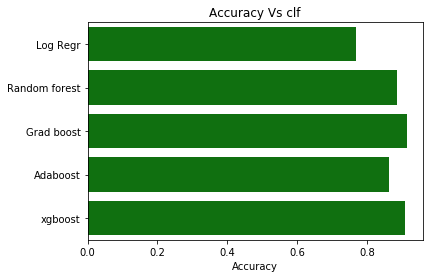

In [111]:
#Comparing performance of all classifiers
acc=[]
acc.append(acc0)
acc.append(acc1)
acc.append(acc2)
acc.append(acc3)
acc.append(acc4)
clf=['Log Regr','Random forest','Grad boost','Adaboost','xgboost']
sns.barplot(x=acc,y=clf,color='green')
plt.xlabel('Accuracy')
plt.title('Accuracy Vs clf')

Text(0.5, 1.0, 'Precision Vs clf')

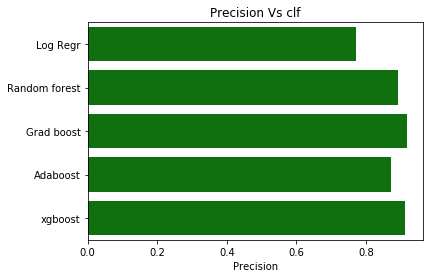

In [112]:
prec=[]
prec.append(prec0)
prec.append(prec1)
prec.append(prec2)
prec.append(prec3)
prec.append(prec4)
clf=['Log Regr','Random forest','Grad boost','Adaboost','xgboost']
sns.barplot(x=prec,y=clf,color='green')
plt.xlabel('Precision')
plt.title('Precision Vs clf')

Text(0.5, 1.0, 'Recall score Vs clf')

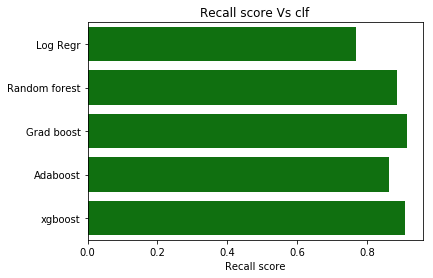

In [113]:
rec=[]
rec.append(rec0)
rec.append(rec1)
rec.append(rec2)
rec.append(rec3)
rec.append(rec4)
clf=['Log Regr','Random forest','Grad boost','Adaboost','xgboost']
sns.barplot(x=rec,y=clf,color='green')
plt.xlabel('Recall score')
plt.title('Recall score Vs clf')

Text(0.5, 1.0, 'f1 score Vs clf')

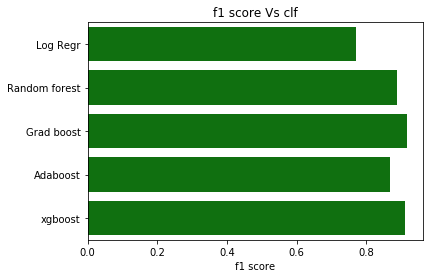

In [114]:
f1=[]
f1.append(f1_score0)
f1.append(f1_score1)
f1.append(f1_score2)
f1.append(f1_score3)
f1.append(f1_score4)
clf=['Log Regr','Random forest','Grad boost','Adaboost','xgboost']
sns.barplot(x=f1,y=clf,color='green')
plt.xlabel('f1 score')
plt.title('f1 score Vs clf')

In [115]:
#Finalising gradient boost as it has max accuracy,precision,recall as well as f1_Score